Objetivo: Descobrir qual a taxa de evasão de cada curso (ECA, SI) por ano de matricula.

Etapas:
- importar os dados
- descobrir o ano de ingresso atráves da matricula
- tratar a situação da matricula para evasão ou não evasão
- utilizar função para garantir que exista apenas um registro (tupla) de cada aluno
- com a situação da matricula e o ano de ingresso, realizar operação para identificar a taxa de evasão

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

dados = pd.read_csv('si-original.csv', na_values=['NULL'], dtype={"MATRICULA" : "object"})
#dados = pd.read_csv('eca-original.csv', na_values=['NULL'], dtype={"MATRICULA" : "object"})

#dados.describe()

In [20]:
dados.shape

(1320, 27)

In [21]:
#CRIANDO CAMPO DE ANO DE INGRESSO PARA CÁLCULO DA IDADE DE INGRESSO
dados['ANO_INGRESSO'] = dados['MATRICULA'].str[:4]

In [22]:
# Verificando valores existentes na coluna de situação da matricula

dados['SIT_MATRICULA'].unique()

array([ 9,  0, 10,  2], dtype=int64)

In [23]:
# Normalizando a coluna de situação da matricula, sendo:
# 0 = matriculado
# 1 = evasão (compreende a categoria 2, 9 e 10)

# categoria 0 = Matriculado
# categoria 2 = Trancado
# categoria 9 = Evasão
# categoria 10 = Cancelado

dados.loc[dados['SIT_MATRICULA']==2,'SIT_MATRICULA'] = 1
dados.loc[dados['SIT_MATRICULA']==9,'SIT_MATRICULA'] = 1
dados.loc[dados['SIT_MATRICULA']==10,'SIT_MATRICULA'] = 1

dados['SIT_MATRICULA'].unique()

array([1, 0], dtype=int64)

In [24]:
# utilizar função para garantir que exista apenas um registro (tupla) de cada aluno 

dados = dados.drop_duplicates(subset='MATRICULA', keep='first')

dados.shape

(84, 28)

In [25]:
# total de alunos por ano
colunas = ['ano', 'Quantidade de alunos', 'Quantidade de evasão', 'Taxa de evasão (%)']
evasao = pd.DataFrame(columns=colunas)

print('Taxa de evasão do curso de Sistemas de Informação por ano.')

for ano in dados.ANO_INGRESSO.unique():
    # identificar quantidade de alunos por ano
    total_alunos_ano = dados.loc[dados['ANO_INGRESSO']==ano, 'ANO_INGRESSO'].count()
    #print('Ano:' + str(ano) + ', quantidade de alunos: ' + str(total_alunos_ano))
    
    # identificar quantidade de evasão por ano
    evasao_ano = dados.loc[(dados['ANO_INGRESSO']==ano) & (dados['SIT_MATRICULA']==1), 'ANO_INGRESSO'].count()
    #print('Quantidade de alunos classificados como evasão: ', evasao_ano)
    
    taxa_evasao = evasao_ano / total_alunos_ano * 100
    
    #print('Taxa de evasão: ' + str(taxa_evasao) + '%')
    
    print('Ano:' + str(ano) + ', quantidade de alunos: ' + str(total_alunos_ano) + ', quantidade evasão: ' + str(evasao_ano) + ', taxa de evasão: ' + str(round(taxa_evasao,2)) + '%')
    
    evasao = evasao.append(pd.DataFrame([[ano, total_alunos_ano, evasao_ano, taxa_evasao]], columns=colunas))



Taxa de evasão do curso de Sistemas de Informação por ano.
Ano:2013, quantidade de alunos: 24, quantidade evasão: 10, taxa de evasão: 41.67%
Ano:2016, quantidade de alunos: 7, quantidade evasão: 0, taxa de evasão: 0.0%
Ano:2014, quantidade de alunos: 27, quantidade evasão: 7, taxa de evasão: 25.93%
Ano:2015, quantidade de alunos: 26, quantidade evasão: 4, taxa de evasão: 15.38%


In [26]:
evasao = evasao.sort('ano')

evasao

C:\Users\Rogerio\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,ano,Quantidade de alunos,Quantidade de evasão,Taxa de evasão (%)
0,2013,24.0,10.0,41.666667
0,2014,27.0,7.0,25.925926
0,2015,26.0,4.0,15.384615
0,2016,7.0,0.0,0.000000


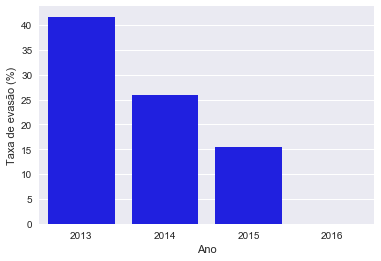

In [27]:
import matplotlib.pyplot as plt
import seaborn as sb


sb.barplot(x='ano', y='Taxa de evasão (%)', data=evasao, color='b')

plt.ylabel('Taxa de evasão (%)')
plt.xlabel('Ano')
plt.show()

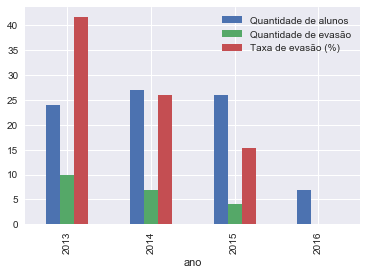

In [28]:
evasao.plot(x=evasao.ano, kind='bar')